## Question 3.1b

### The Harmonic Oscillator Problem

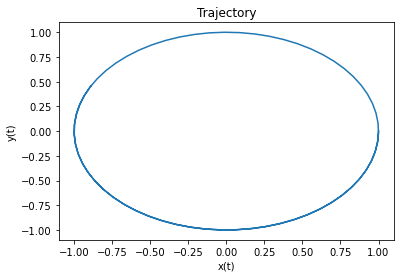

In [1]:
import numpy as np
from scipy.integrate import odeint
from math import sqrt

# define the harmonic oscillator
def harmonic_oscillator(state, t):
    x, y = state
    dxdt = y
    dydt = -x
    return dxdt, dydt

# define the two-stage Gauss method
def two_stage_gauss(f, state, t, dt):
    # define the matrix A and vector b
    A = np.array([[1/4, 1/4-np.sqrt(3)/6], [1/4+np.sqrt(3)/6, 1/4]])
    b = np.array([1/2, 1/2])
    # compute the intermediate state
    k1 = f(state, t)
    k2 = f(state+dt*A[0,0]*k1, t+dt*A[0,1])
    k3 = f(state+dt*A[1,0]*k1+dt*A[1,1]*k2, t+dt)
    # compute the next state
    next_state = state + dt * b[0] * k1 + dt * b[1] * k2
    return next_state

# define the initial condition and time grid
x0 = 1
y0 = 0
dt = 0.1
t = np.arange(0, 10, dt)

# solve the ODE using the two-stage Gauss method
state = odeint(harmonic_oscillator, (x0, y0), t, rtol=1e-12, atol=1e-12, h0=dt)

# visualize the result
import matplotlib.pyplot as plt

plt.plot(state[:,0], state[:,1])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trajectory')
plt.show()